# A Machine Learning Project


# Content-Based 🎥 Movie Recommender System 🎬

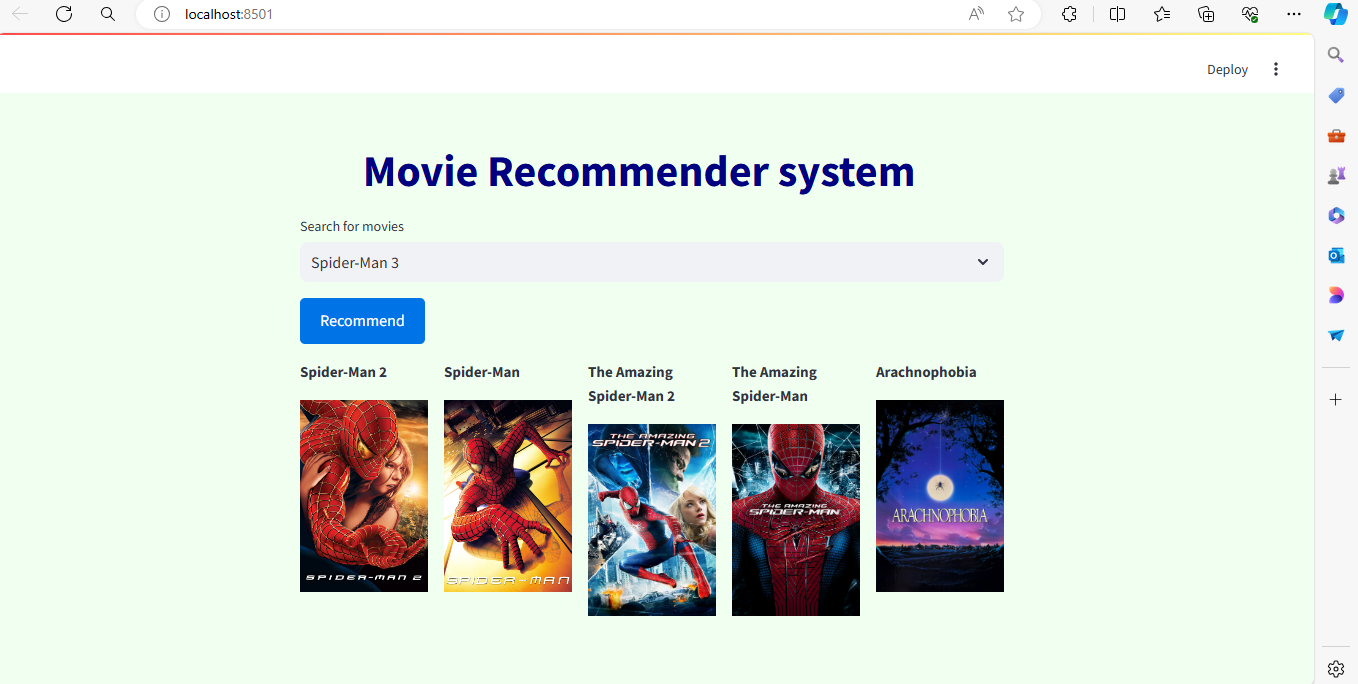


### Objective Statement:

- The objective of the Content-Based Movie Recommender System project is to develop an intelligent recommendation system that leverages movie attributes such as genre, cast, and plot to provide personalized movie suggestions to users. By analyzing these intrinsic characteristics of movies, the system aims to enhance user experience by offering relevant and engaging recommendations, thereby facilitating the discovery of new films aligned with individual preferences and tastes.

### Dataset Overview:

- The dataset comprises information on 5000 movies sourced from Kaggle. Each entry contains various attributes and metadata associated with the movies, providing a comprehensive overview of the film industry. Key features may include movie titles, release dates, genres, directors, cast members, production companies, budget, revenue, ratings, and plot summaries. This dataset facilitates exploratory data analysis, machine learning model training, and the development of recommendation systems and predictive analytics applications within the domain of movie analysis and entertainment.

- Unlike collaborative filtering methods, which rely on user behavior and preferences, content-based systems focus on the intrinsic characteristics of movies, such as genres, actors, directors, and plot keywords.


### Importance of Recommender System:

- A recommendation system, sometimes known as a recommendation engine, is a paradigm for information filtering that aims to anticipate user preferences and offer suggestions in accordance with these preferences. These technologies are now widely used in a variety of industries, including those that deal with utilities, books, music, movies, television, apparel, and restaurants. These systems gather data on a user’s preferences and behavior, which they then employ to enhance their future suggestions.

- A movie recommendation engine is a system that suggests movies to users based on their preferences, ratings, or viewing history. There are different types of movie recommendation engines, such as content-based, collaborative filtering, or hybrid methods. Each of these methods uses different algorithms and data sources to provide personalized and accurate recommendations.

- Watching movies is fun, but figuring out what movie to watch next is a nerve-racking experience. Endlessly scrolling through Netflix, watching trailers on Youtube looking up IMDB Rating, wasting half an hour and still cannot decide what to watch? 

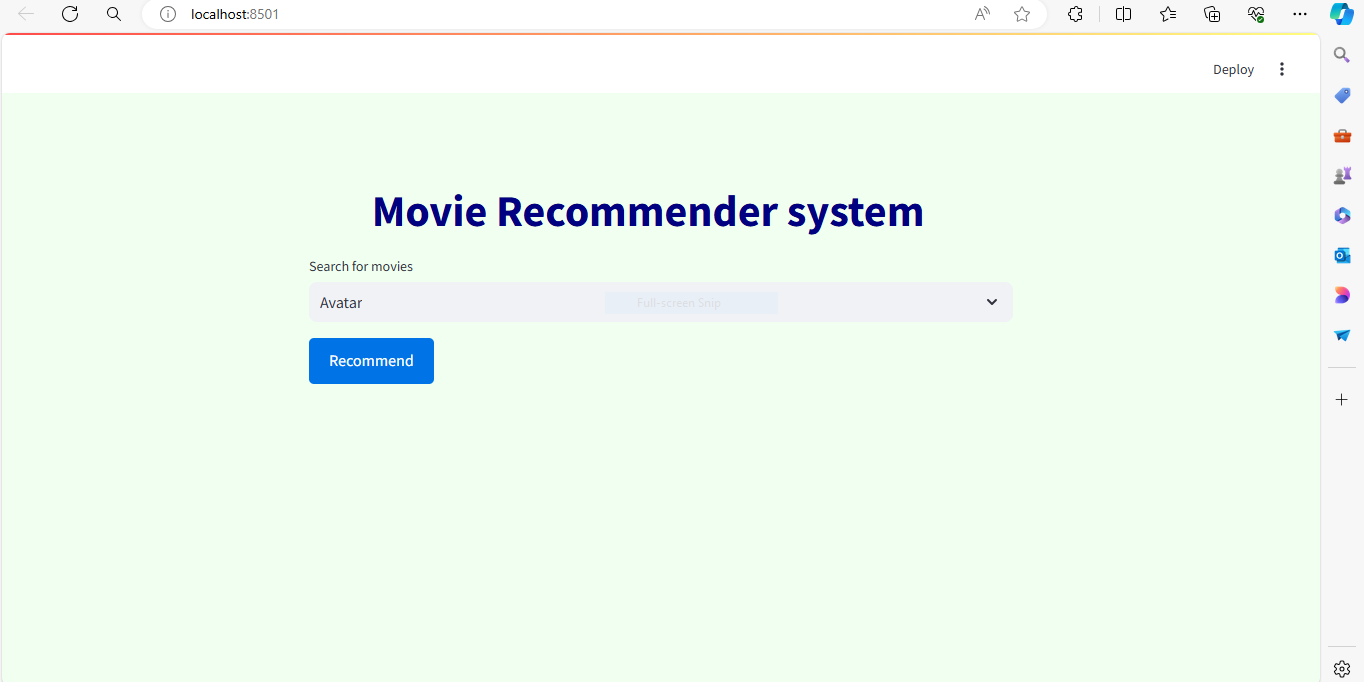

### For example:

- if a user enters "The Dark Knight" as their favorite movie, the recommender system may suggest movies like "The Dark Knight Rises," "Batman Begins," "Inception," "Interstellar," and "Fight Club" based on similarities in genre (action, thriller), cast (Christian Bale, Heath Ledger), director (Christopher Nolan), and themes (complex characters, moral ambiguity).

### Key Attributes:

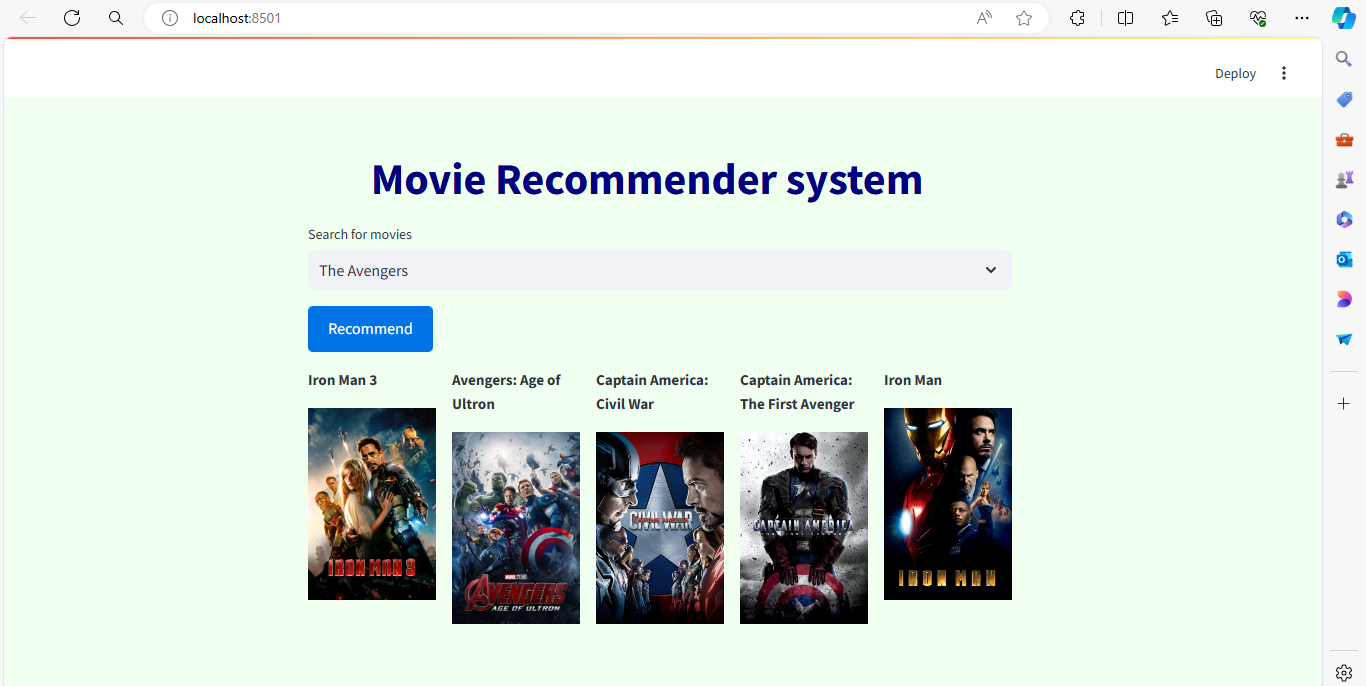

- These attributes provide valuable information about each movie and can be used for analysis, visualization, and modeling in various applications, such as recommendation systems, predictive analytics, and market research.

1. **Title**: The title of the movie.
2. **Release Date**: The date when the movie was released.
3. **Genres**: The categories or genres that the movie belongs to (e.g., action, comedy, drama).
4. **Director**: The director(s) of the movie.
5. **Cast**: The main actors or actresses starring in the movie.
6. **Production Company**: The company or companies responsible for producing the movie.
7. **Budget**: The estimated or actual budget of the movie.
8. **Revenue**: The total revenue generated by the movie, typically at the box office.
9. **Runtime**: The duration of the movie in minutes.
10. **Plot Summary**: A brief summary or description of the movie's plot or storyline.
11. **Rating**: The rating given to the movie by critics or audiences (e.g., IMDb rating, Rotten Tomatoes score).
12. **Popularity**: A measure of the movie's popularity or public interest, often based on factors like social media mentions or online searches.
13. **Awards**: Any awards or nominations received by the movie, such as Oscars or Golden Globes.
14. **Keywords**: Keywords or tags associated with the movie, describing its themes, topics, or motifs.
15. **Poster Image**: An image or poster associated with the movie, typically used for promotional purposes.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [2]:
#Importing datasets and creating dataframes
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
#merging movies & credits dataframes as movies
movies = movies.merge(credits,on='title')

In [6]:
#no.of rows & columns
movies.shape

(4809, 23)

In [7]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [8]:
movies['original_language'].value_counts()

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### Data Preprocessing:

- A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

- It involves below steps:

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data


### Data Cleaning:

Data cleaning is the process of preparing raw data for analysis by removing or correcting inaccurate, incomplete, or irrelevant records. It involves identifying and handling missing values, normalizing data formats, filtering outliers, and ensuring consistency across the dataset. The goal is to enhance data quality and reliability, making it suitable for accurate analysis and decision-making.

In [10]:
#Removing unwanted columns & considering required
movies= movies[['movie_id','title','overview','genres', 'keywords','cast','crew']]

In [11]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [12]:
#checking for null values
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
#Removing NA
movies.dropna(inplace=True)

In [14]:
#checking for duplicates
movies.duplicated().sum()

0

### Pandas .iloc[] in Python

- In the Python Pandas library, .iloc[] is an indexer used for integer-location-based indexing of data in a DataFrame. It allows users to select specific rows and columns by providing integer indices, making it a valuable tool for data manipulation and extraction based on numerical positions within the DataFrame. This indexer is particularly useful when you want to access or manipulate data using integer-based positional indexing rather than labels.

In [15]:
#checking format of 0th row in genres which is list of dictionaries 
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

### ast module:

- The ast module provides a set of tools to generate, parse, and manipulate abstract syntax trees of the Python language.

- The ast.literal_eval() method is a useful tool for processing data that is stored in a string format, such as JSON data or configuration files. By using the ast.literal_eval() method, we can quickly and easily parse this data into a Python data structure that can be used in our code.The ast.literal_eval() method is a valuable tool for any Python programmer looking to process and manipulate data in their code.

In [16]:
#converting a list of strings into a list
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [17]:
# converting string to list
# append - The append() method in Python adds a single item to the end of the existing list. 
# After appending to the list, the size of the list increases by one.
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [18]:
#Applying convert function to genres
movies['genres'] = movies['genres'].apply(convert)

In [19]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [20]:
#Applying convert function to keywords
movies['keywords'].apply(convert)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [21]:
movies['keywords']= movies['keywords'].apply(convert)

In [22]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [23]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [24]:
#extracting top3 actors names from 1st three dictionaries of all movies
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
           L.append(i['name'])
           counter+=1
        else:
            break   
    return L

In [25]:
#Applying convert3 function to cast
movies['cast'].apply(convert3)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [26]:
#saving changes to movies_cast
movies['cast'] = movies['cast'].apply(convert3)

In [27]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [28]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [29]:
#fetching only director names of all movies
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i ['job'] == 'Director':
             L.append(i['name'])
             break
    return L

In [30]:
#Applying fetch_director function to crew
movies['crew'].apply(fetch_director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [31]:
#saving changes to movies_crew
movies['crew']= movies['crew'].apply(fetch_director)

In [32]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


### Lambda Function

- A lambda function is a small anonymous function.A lambda function can take any number of arguments, but can only have one expression.The power of lambda is better shown when you use them as an anonymous function inside another function.

#### Syntax

- lambda arguments : expression

##### Example

x = lambda a, b, c : a + b + c
print(x(5, 6, 2))

#### Split Method:

- The split() method splits a string into a list.You can specify the separator, default separator is any whitespace.


In [33]:
#converting overview column into list
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [34]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [35]:
#removing spaces between words to avoid confusion if names are similar
movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])


0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [36]:
#removing spaces between words to avoid confusion if names are similar
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])


In [37]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [38]:
#concatenating all columns as tags column
movies['tags']= movies['overview']+movies['genres']+movies['keywords']+movies['cast']+ movies['crew']

In [39]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [40]:
#creating a new dataframe as new_df with necessary columns
new_df = movies[['movie_id','title','tags']]

In [41]:
#converting list to string
new_df['tags']= new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11160\1369294267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']= new_df['tags'].apply(lambda x:" ".join(x))


In [42]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [43]:
# Viewing a particular row which is a concatenated large string
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [44]:
#converting to lower case
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11160\3413467545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [45]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."


In [46]:
#creating an object ps of class porterstemmer
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [47]:
#function stem - converts string into list and each word stemming
#stemming-collects all inflected forms of a word in order to break them down to their root form
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [48]:
#applying stem for tags & saved to new_df_tags
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11160\1642327719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


### Vectorization:

- Time complexity in the execution of any algorithm is very crucial deciding whether an application is reliable or not. To run a large algorithm in as much as optimal time possible is very important when it comes to real-time application of output. To do so, Python has some standard mathematical functions for fast operations on entire arrays of data without having to write loops. One of such library which contains such function is numpy.

- Vectorization is a technique that converts text or other types of data into numerical vectors that can be used for machine learning. You can use vectorization to represent movies or users as vectors based on their features, such as genre, cast, director, keywords, ratings, etc. You can also use vectorization to measure the similarity or dissimilarity between movies or users, such as cosine similarity, euclidean distance, or Jaccard index.

### Bag of Words:

- The Bag of Words (BoW) model represents text by converting it into a collection of individual words, disregarding grammar and word order but keeping multiplicity. For a movie recommender system, each movie's description is converted into a vector of word frequencies.A feature extraction technique used in natural language processing (NLP). It converts text data into numerical representations that can be used by machine learning algorithms.

### Key Points:

1. Text Representation: BoW represents text by counting the occurrence of each word in the text, creating a vector of word frequencies.
2. Vocabulary Creation: It builds a vocabulary of all unique words in the corpus.
3. Vectorization: Each document is then represented as a vector indicating the frequency of each word in the vocabulary.

#### Example:

1. Movie A description: "A thrilling adventure in space."
2. Movie B description: "A romantic adventure on Earth."
3. Corpus: ["A thrilling adventure in space.", "A romantic adventure on Earth."]
4. Combined vocabulary: {A, thrilling, adventure, in, space, romantic, on, Earth}

### Vectors:

- Using these vectors, similarity between movies can be calculated to recommend similar movies to users.

- Movie A: [1, 1, 1, 1, 1, 0, 0, 0]
- Movie B: [1, 0, 1, 0, 0, 1, 1, 1]

### Application:

- BoW vectors can be fed into machine learning models (e.g., Naive Bayes, SVM) for tasks like text classification, sentiment analysis, or recommendations, where the similarity between text documents is assessed based on their vector representations.


In [49]:
#vectorization - stop words are excluded
#converting concatenated large text into vector using BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [50]:
#converting cv into a numpy array
cv.fit_transform(new_df['tags']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
#checking shape (movies v/s words)
cv.fit_transform(new_df['tags']).toarray().shape

(4806, 5000)

In [52]:
#saving as vectors
vectors=cv.fit_transform(new_df['tags']).toarray()

In [53]:
#1st movie vector
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
['loved', 'loving', 'loved']
['love', 'love','love']

['love', 'love', 'love']

In [55]:
#stemming-root word
ps.stem('loving')

'love'

In [56]:
#stemming
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

### Similarity:

- Similarity is a measure of how alike two objects or vectors are. In the context of vector space, similarity quantifies the likeness between vectors representing items such as text documents, images, or user preferences. Higher similarity values indicate greater likeness.

### Types of Similarity Measures:

1. **Cosine Similarity:** Measures the cosine of the angle between two vectors. Ranges from -1 (opposite) to 1 (identical).
2. **Euclidean Distance:** Measures the straight-line distance between two points in space.
3. **Jaccard Similarity:** Measures the size of the intersection divided by the size of the union of two sets.
4. **Manhattan Distance:** Measures the sum of absolute differences between the components of two vectors.
5. **Pearson Correlation:** Measures the linear correlation between two sets of data, ranging from -1 to 1.

### Cosine Similarity:

- Cosine similarity and other similarity measures are used to determine the similarity between two vectors in a multi-dimensional space. These measures are crucial in applications like text analysis, information retrieval, and recommendation systems.

### Definition: 

- Measures the cosine of the angle between two non-zero vectors. It ranges from -1 (completely dissimilar) to 1 (completely similar).

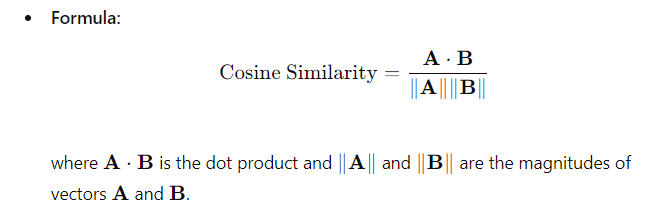

### Application in Movie Recommender System :

- In a movie recommender system, these similarity measures can compare the vector representations (e.g., BoW) of movie descriptions or user preferences to identify and recommend movies that are similar to those the user has liked or rated highly in the past.


In [57]:
# Importing cosine similarity it is between 0 to 1, 1-similar, 0-less similar
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
#calculating vectors distance between each movie with other 4806 movies 
cosine_similarity(vectors)

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [59]:
cosine_similarity(vectors).shape

(4806, 4806)

In [60]:
#storing 
similarity=cosine_similarity(vectors)

In [61]:
#similarity metrics is distance of 1st movie with other 4806 movies
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [62]:
#similarity metrics is array of arrays
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [63]:
similarity.shape

(4806, 4806)

In [64]:
#function for recommendation
def recommend(movie):
    movie_index=new_df[new_df['title'] == movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [65]:
# Recommends top 5 similar movies
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [66]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


### Pickle: 

- Pickle is a standard library module in Python, simplifies the process of saving and loading complex data structures like lists, dictionaries, and custom objects, into a byte stream for storage or transmission and then reconstruct them back into their original form. This functionality is particularly useful for tasks like saving and loading machine learning models, caching data, or sharing objects between processes.

1. **Saving DataFrame as `movies.pkl`**:
   - I've chosen to store a DataFrame, labeled `new_df`, as `movies.pkl`.
   - This DataFrame typically holds comprehensive movie data like titles, genres, ratings, or descriptions.
   - By saving this DataFrame, I ensure swift access without the need to recompute or reload data from its original source.

2. **Saving DataFrame as Dictionary in `movie_dict.pkl`**:
   - I've transformed the DataFrame `new_df` into a dictionary format utilizing the `to_dict()` function.
   - Subsequently, I've retained this dictionary representation by saving it as `movie_dict.pkl`.
   - Storing the DataFrame as a dictionary proves advantageous for specific operations that benefit from dictionary-like access.

3. **Saving Similarity Matrix as `similarity.pkl`**:
   - I've archived a similarity matrix under the file name `similarity.pkl`.
   - This matrix typically encapsulates similarity scores between movies, typically calculated via a metric like cosine similarity.
   - The stored similarity matrix allows me to sidestep the necessity of recalculating movie similarities, particularly beneficial given their potentially intensive computational demands.

- Pickle facilitates the preservation of crucial data structures and outcomes within my movie recommender system, thereby streamlining future access and reuse across different project sessions.

In [67]:
import pickle

In [69]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [72]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [76]:
#converting the dataframe into dictionary
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [77]:
pickle.dump(similarity,open('similarity.pkl','wb'))

### API:

- API (Application Programming Interface) is a set of rules facilitating communication between software components, enabling access to external data sources like movie databases. For example, the TMDB API provides movie-related information.

### CSS:

- CSS (Cascading Style Sheets) is a language that dictates the presentation of HTML elements on web pages. It allows customization of appearance, including colors, fonts, and layout, in Streamlit apps. Additionally, CSS can be used to create animations and effects.

**TMDB:https://api.themoviedb.org/3/movie/{movie_id}?api_key=<<api_key>>&language=en-US

**Example: Give movie id=65 and API key = 8265bd1679663a7ea12ac168da84d2e8

https://api.themoviedb.org/3/movie/65?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US

output is in JSON: A Specific **movie id=65** dictionary with all its key-value pairs.

{"adult":false,"backdrop_path":"/bfccQmQWNFQYRv4PHgCnjDu7PXn.jpg","belongs_to_collection":null,"budget":41000000,"genres":[{"id":18,"name":"Drama"},{"id":10402,"name":"Music"}],"homepage":"https://www.uphe.com/movies/8-mile","id":65,"imdb_id":"tt0298203","origin_country":["US"],"original_language":"en","original_title":"8 Mile","overview":"For Jimmy Smith, Jr., life is a daily fight just to keep hope alive. Feeding his dreams in Detroit's vibrant music scene, Jimmy wages an extraordinary personal struggle to find his own voice - and earn a place in a world where rhymes rule, legends are born and every moment… is another chance.","popularity":66.294,"poster_path":"/7BmQj8qE1FLuLTf7Xjf9sdIHzoa.jpg","production_companies":[{"id":24,"logo_path":null,"name":"Mikona Productions","origin_country":"DE"},{"id":23,"logo_path":"/bJOFo2ufq7iFC1F4qZm8aLxF5aS.png","name":"Imagine Entertainment","origin_country":"US"}],"production_countries":[{"iso_3166_1":"DE","name":"Germany"},{"iso_3166_1":"US","name":"United States of America"}],"release_date":"2002-11-08","revenue":242875078,"runtime":111,"spoken_languages":[{"english_name":"English","iso_639_1":"en","name":"English"}],"status":"Released","tagline":"Every moment is another chance","title":"8 Mile","video":false,"vote_average":7.135,"vote_count":6993}

### Pycharm code:

import streamlit as st
import pickle
import pandas as pd
import requests

def fetch_poster(movie_id):
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US'.format(movie_id))
    data = response.json()

    # tmdb image path + poster path = complete poster path
    return "https://image.tmdb.org/t/p/original" + data ['poster_path']

def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies=[]
    recommended_movies_posters=[]
    for i in movies_list:
        movie_id = movies.iloc[i[0]].movie_id

        recommended_movies.append(movies.iloc[i[0]].title)
        # fetch poster from API
        recommended_movies_posters.append(fetch_poster(movie_id))
    return recommended_movies, recommended_movies_posters

movies_dict = pickle.load(open('movie_dict.pkl','rb'))
movies = pd.DataFrame(movies_dict)

similarity = pickle.load(open('similarity.pkl','rb'))

Custom CSS
st.markdown ("""
<style>
body {
    background-color: #e6e6fa;
}
.main {
    background-color: #f0fff0;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
}
h1 {
    color: #000080;
    text-align: center;
}

h2, h3, h4, h5, h6 {
    color: #000080; 
}

.stButton button {
    background-color: #0073e6;
    color: white;
    border: none;
    padding: 10px 20px;
    border-radius: 5px;
    cursor: pointer;
}
.stButton button:hover {
    background-color: #004d00;
}

.custom-text {
    font-size: 15px; /* Increase text size */
    font-weight: bolder; /* Make text bold */
}
</style>
""", unsafe_allow_html=True)

st.title('Movie Recommender system')

selected_movie_name = st.selectbox(
    "Search for movies", movies['title'].values)

if st.button("Recommend"):
    names,posters = recommend(selected_movie_name)

    col1, col2, col3, col4, col5 = st.columns(5)

    with col1:
        st.markdown(f'<p class="custom-text">{names[0]}</p>', unsafe_allow_html=True)
        st.image(posters[0])

    with col2:
        st.markdown(f'<p class="custom-text">{names[1]}</p>', unsafe_allow_html=True)
        st.image(posters[1])

    with col3:
        st.markdown(f'<p class="custom-text">{names[2]}</p>', unsafe_allow_html=True)
        st.image(posters[2])

    with col4:
        st.markdown(f'<p class="custom-text">{names[3]}</p>', unsafe_allow_html=True)
        st.image(posters[3])

    with col5:
        st.markdown(f'<p class="custom-text">{names[4]}</p>', unsafe_allow_html=True)
        st.image(posters[4])

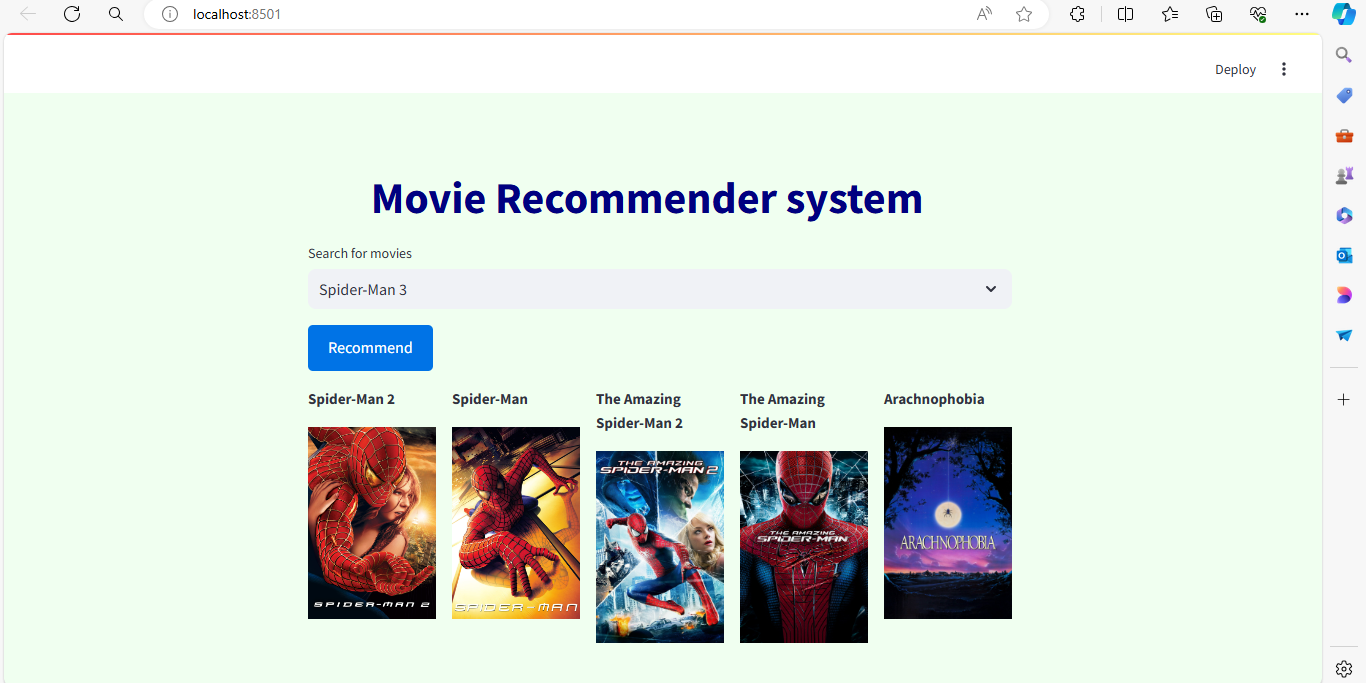

### Conclusion:

- The Content-Based Movie Recommender System leverages detailed movie attributes such as genre, cast, director, and plot to provide users with personalized movie recommendations. By focusing on the intrinsic characteristics of movies, the system effectively identifies and suggests films similar to a user's input, thereby enhancing the user's discovery experience. 

- Throughout the development process, thorough data cleaning ensured the accuracy and consistency of the dataset, resulting in reliable recommendations. This recommender system demonstrates the potential of content-based filtering in delivering relevant and engaging movie suggestions, ultimately improving user satisfaction and engagement with the platform.

- By harnessing the rich information within the dataset, this system not only helps users find movies that match their preferences but also paves the way for future enhancements, such as integrating collaborative filtering techniques or incorporating user feedback to further refine recommendation accuracy.

### Future Advancements: 🎬

1. **Exploring Advanced Algorithms**: Delve into deep learning or graph-based models to enhance recommendation accuracy.
2. **Enhancing Multi-criteria Recommendations**: Allow users to specify multiple preferences for a more tailored movie selection.
3. **Integrating Social Preferences**: Incorporate friends' movie preferences from social media platforms to enrich the recommendation process.
4. **Expanding Content Diversity**: Broaden the movie database by including niche genres and international films, catering to diverse tastes.
5. **Implementing Dynamic Updates**: Reflect real-time changes in preferences by dynamically updating recommendations based on interactions.
6. **Adding User Engagement Features**: Enhance user engagement by incorporating gamification elements to make the movie discovery process more interactive.
7. **Cross-domain Recommendations**: Expand beyond movies and recommend other forms of entertainment like TV shows, music, and more for a comprehensive entertainment experience.

## Thank you 😊